In [126]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Implement me
# Set working directory
data_path = '/content/drive/My Drive/Colab Notebooks/NLP/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data

In [0]:
import pandas as pd

# Load raw data
rt_data_2_raw = pd.read_csv(data_path + 'rt_data.csv', header = 0)


# Make a copy of df_raw
rt_data2 = rt_data_2_raw.copy(deep = True)

In [0]:
# Print the dimension of rt_data2
# pd.DataFrame([[rt_data2.shape[0], rt_data2.shape[1]]], columns = ['# rows', '# columns'])

,# rows,# columns
0,48869,3


In [0]:
rt_data2

,Unnamed: 0,review,fresh
0,0,A distinctly gallows take on contemporary fina...,positive
1,1,It's an allegory in search of a meaning that n...,negative
2,2,... life lived in a bubble in financial dealin...,positive
3,3,Continuing along a line introduced in last yea...,positive
4,4,... a perverse twist on neorealism...,positive
...,...,...,...
48864,54423,"Despite the title, Wasabi isn't so spicy.",negative
48865,54424,Dawdles and drags when it should pop; it doesn...,negative
48866,54425,Despite Besson's high-profile name being Wasab...,positive
48867,54426,The film lapses too often into sugary sentimen...,negative


## Preprocess

### Preprocess rt_data

In [0]:
rt_data2 = rt_data2.drop(columns=['Unnamed: 0'])

In [0]:
# Set target

rt_target2 = 'fresh'

In [0]:
from sklearn.preprocessing import LabelEncoder

# Init the LabelEncoder
le = LabelEncoder()

# Encode the categorical features in the data
rt_data2[rt_target2] = le.fit_transform(rt_data2[rt_target2].astype(str))

In [0]:
rt_data2.head()

,review,fresh
0,A distinctly gallows take on contemporary fina...,1
1,It's an allegory in search of a meaning that n...,0
2,... life lived in a bubble in financial dealin...,1
3,Continuing along a line introduced in last yea...,1
4,... a perverse twist on neorealism...,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Divide the data into training and testing
rt2_df_train, rt2_df_test = train_test_split(rt_data2, train_size = 0.8, random_state = 42)

# Reset the index
rt2_df_train, rt2_df_test = rt2_df_train.reset_index(drop = True), rt2_df_test.reset_index(drop = True)

In [0]:
pd.DataFrame([[rt2_df_train.shape[0], rt2_df_train.shape[1]]], columns = ['# rows', '# columns'])

,# rows,# columns
0,39095,2


In [0]:
pd.DataFrame([[rt2_df_test.shape[0], rt2_df_test.shape[1]]], columns = ['# rows', '# columns'])

,# rows,# columns
0,9774,2


### Text data preprocessing

In [0]:
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def review_to_text_2(review, remove_stopwords):

  # remove non-letter
  letters = re.sub('[^a-zA-Z]', ' ', review)
  words = letters.lower().split()
  
  # remove stopwords
  if remove_stopwords:
    all_stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in all_stop_words]

  return words

In [0]:
X_rt2_train = [' '.join(review_to_text_2(review, True)) for review in rt2_df_train['review']]
y_rt2_train = rt2_df_train[rt_target2]

In [0]:
X_rt2_train[0]

'yes lot jokes consistently funny ralph vanellope gift turning standard tropes sideways'

In [0]:
X_rt2_test = [' '.join(review_to_text_2(review, True)) for review in rt2_df_test['review']]
y_rt2_test = rt2_df_test[rt_target2]

### Get text features

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVec
count_vec = CountVectorizer(analyzer = 'word', binary=True, ngram_range=(1,2))

In [0]:
#transformed train reviews
cv_train_reviews=count_vec.fit_transform(X_rt2_train)
#transformed test reviews
cv_test_reviews=count_vec.transform(X_rt2_test)

In [0]:
cv_train_reviews.shape

(39095, 347193)

In [0]:
cv_test_reviews.shape

(9774, 347193)

In [0]:
# Tf_Idf
tfidf_vec = TfidfVectorizer(analyzer = 'word', binary=True, ngram_range=(1,2))

#transformed train reviews
tv_train_reviews = tfidf_vec.fit_transform(X_rt2_train)

#transformed test reviews
tv_test_reviews = tfidf_vec.transform(X_rt2_test)

In [0]:
# Print
print(tv_train_reviews)

  (0, 316845)	0.2519661522646674
  (0, 286510)	0.2519661522646674
  (0, 318521)	0.2519661522646674
  (0, 127784)	0.2519661522646674
  (0, 327181)	0.2519661522646674
  (0, 243167)	0.23074731778348018
  (0, 123328)	0.2519661522646674
  (0, 57555)	0.2053064053074075
  (0, 159971)	0.2519661522646674
  (0, 178549)	0.2425766684277563
  (0, 345779)	0.2519661522646674
  (0, 273845)	0.20240796279227471
  (0, 316825)	0.1863565341531132
  (0, 286447)	0.16330509169303084
  (0, 318471)	0.17134997371421948
  (0, 127746)	0.1765173795562452
  (0, 327179)	0.21986329498634435
  (0, 243150)	0.16963383194811218
  (0, 122935)	0.10483613964865654
  (0, 57535)	0.1648668507773694
  (0, 159941)	0.13871878972209037
  (0, 178417)	0.12401148976445858
  (0, 345723)	0.15833993444222424
  (1, 302892)	0.16378736401535798
  (1, 240159)	0.1850991229741454
  :	:
  (39093, 40231)	0.21541053032902338
  (39093, 134234)	0.21541053032902338
  (39093, 165088)	0.21541053032902338
  (39093, 248424)	0.18354749209115936
  (39093,

In [0]:
tv_train_reviews.shape

(39095, 347193)

In [0]:
tv_test_reviews.shape

(9774, 347193)

### Model

#### Prepare

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

pip_mnb = Pipeline([('mnb', MultinomialNB())])

params_mnb = {'mnb__alpha': [0.1, 1.0, 10.0]}

#### Model1

In [0]:
mnb_cv = GridSearchCV(pip_mnb, params_mnb, cv=4, verbose=1)
mnb_cv.fit(cv_train_reviews, y_rt2_train)

print(mnb_cv.best_score_)
print(mnb_cv.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7816346033474292
{'mnb__alpha': 1.0}


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished


In [0]:
model1 = Pipeline([('mnb', MultinomialNB(alpha = 1.0))])
model1.fit(cv_train_reviews, y_rt2_train)

Pipeline(memory=None,
         steps=[('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
mnb_cv_predict = model1.predict(cv_test_reviews)

In [0]:
mnb_cv_predict

array([1, 1, 1, ..., 1, 1, 1])

Accuracy of the model

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Accuracy score for cv of words
mnb_cv_score = accuracy_score(y_rt2_test, mnb_cv_predict)

In [0]:
# print mnb_cv_score
mnb_cv_score

0.7667280540208717

Print the classification report

In [0]:
#Classification report for cv of words 
mnb_cv_report = classification_report(y_rt2_test, mnb_cv_predict, target_names = ['Positive', 'Negative'])

In [0]:
# print
print(mnb_cv_report)

              precision    recall  f1-score   support

    Positive       0.82      0.52      0.64      3839
    Negative       0.75      0.92      0.83      5935

    accuracy                           0.77      9774
   macro avg       0.78      0.72      0.73      9774
weighted avg       0.78      0.77      0.75      9774



Plot the confusion matrix

In [0]:
#confusion matrix for cv of words
mnb_cv_cm = confusion_matrix(y_rt2_test, mnb_cv_predict, labels = [1,0])

In [0]:
# print
print(mnb_cv_cm)

[[5479  456]
 [1824 2015]]


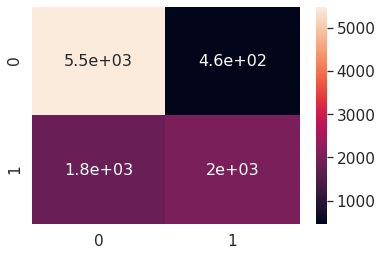

In [0]:
# plot
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) # for label size
sn.heatmap(mnb_cv_cm, annot = True, annot_kws = {"size": 16}) # font size

plt.show()

In [0]:
import joblib

joblib.dump(model1, '/content/drive/My Drive/Colab Notebooks/NLP/model1.m')

['/content/drive/My Drive/Colab Notebooks/NLP/model1.m']

#### Model2

In [0]:
mnb_tv = GridSearchCV(pip_mnb, params_mnb, cv=4, verbose=1)
mnb_tv.fit(tv_train_reviews, y_rt2_train)

print(mnb_tv.best_score_)
print(mnb_tv.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7662106641929984
{'mnb__alpha': 0.1}


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished


In [0]:
model2 = Pipeline([('mnb', MultinomialNB())])
model2.fit(tv_train_reviews, y_rt2_train)

Pipeline(memory=None,
         steps=[('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
mnb_tv_predict = model2.predict(tv_test_reviews)

In [0]:
mnb_tv_predict

array([1, 1, 1, ..., 1, 1, 1])

Accuracy of the model

In [0]:
#Accuracy score for tfidf of words
mnb_tv_score = accuracy_score(y_rt2_test, mnb_tv_predict)

In [0]:
mnb_tv_score

0.7636586863106201

Print the classification report

In [0]:
#Classification report for cv of words 
mnb_tv_report = classification_report(y_rt2_test, mnb_tv_predict, target_names = ['Positive', 'Negative'])

In [0]:
# print
print(mnb_tv_report)

              precision    recall  f1-score   support

    Positive       0.79      0.55      0.65      3839
    Negative       0.76      0.90      0.82      5935

    accuracy                           0.76      9774
   macro avg       0.77      0.73      0.73      9774
weighted avg       0.77      0.76      0.75      9774



Plot the confusion matrix

In [0]:
mnb_tv_cm = confusion_matrix(y_rt2_test, mnb_tv_predict, labels = [1,0])

In [0]:
# print
print(mnb_tv_cm)

[[5364  571]
 [1739 2100]]


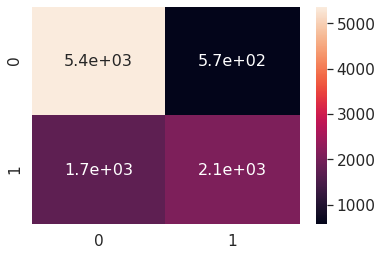

In [0]:
# plot
sn.set(font_scale=1.4) # for label size
sn.heatmap(mnb_tv_cm, annot = True, annot_kws = {"size": 16}) # font size

plt.show()

In [0]:
joblib.dump(model2, '/content/drive/My Drive/Colab Notebooks/NLP/model2.m')

['/content/drive/My Drive/Colab Notebooks/NLP/model2.m']

#### Model3

In [0]:
model3 = LogisticRegression(C = 0.1, penalty = 'l2', random_state = 42)
model3.fit(cv_train_reviews, y_rt2_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lg_cv_predict = model3.predict(cv_test_reviews)

In [0]:
lg_cv_predict

array([1, 1, 1, ..., 1, 1, 1])

Accuracy of the model

In [0]:
#Accuracy score for cv of words
lg_cv_score = accuracy_score(y_rt2_test, lg_cv_predict)

In [0]:
# print
print(lg_cv_score)

0.7710251688152241


Print the classification report

In [0]:
#Classification report for cv of words 
lg_cv_report = classification_report(y_rt2_test, lg_cv_predict, target_names = ['Positive', 'Negative'])

In [0]:
# print
print(lg_cv_report)

              precision    recall  f1-score   support

    Positive       0.76      0.61      0.68      3839
    Negative       0.78      0.88      0.82      5935

    accuracy                           0.77      9774
   macro avg       0.77      0.74      0.75      9774
weighted avg       0.77      0.77      0.77      9774



Plot the confusion matrix

In [0]:
lg_cv_cm = confusion_matrix(y_rt2_test, lg_cv_predict, labels = [1,0])

In [0]:
# print
print(lg_cv_cm)

[[5203  732]
 [1506 2333]]


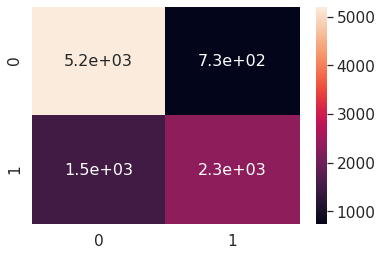

In [0]:
# plot
sn.set(font_scale=1.4) # for label size
sn.heatmap(lg_cv_cm, annot = True, annot_kws = {"size": 16}) # font size

plt.show()

In [0]:
joblib.dump(model3, '/content/drive/My Drive/Colab Notebooks/NLP/model3.m')

['/content/drive/My Drive/Colab Notebooks/NLP/model3.m']

#### Model4

In [0]:
model4 = LogisticRegression(C = 0.1, penalty = 'l2', random_state = 42)
model4.fit(tv_train_reviews, y_rt2_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lg_tv_predict = model4.predict(tv_test_reviews)

In [0]:
lg_tv_predict

array([1, 1, 1, ..., 1, 1, 1])

Accuracy of the model

In [0]:
#Accuracy score for tv of words
lg_tv_score = accuracy_score(y_rt2_test, lg_tv_predict)

In [0]:
# print
print(lg_tv_score)

0.6511152036013914


Print the classification report

In [0]:
#Classification report for tv of words 
lg_tv_report = classification_report(y_rt2_test, lg_tv_predict, target_names = ['Positive', 'Negative'])

In [0]:
# print
print(lg_tv_report)

              precision    recall  f1-score   support

    Positive       0.86      0.13      0.23      3839
    Negative       0.64      0.99      0.77      5935

    accuracy                           0.65      9774
   macro avg       0.75      0.56      0.50      9774
weighted avg       0.73      0.65      0.56      9774



Plot the confusion matrix

In [0]:
lg_tv_cm = confusion_matrix(y_rt2_test, lg_tv_predict, labels = [1,0])

In [0]:
# print
print(lg_tv_cm)

[[5853   82]
 [3328  511]]


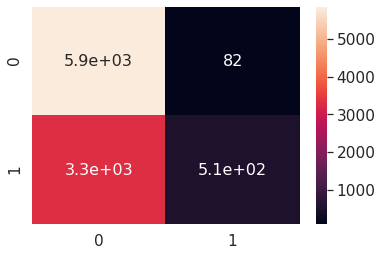

In [0]:
# plot
sn.set(font_scale=1.4) # for label size
sn.heatmap(lg_tv_cm, annot = True, annot_kws = {"size": 16}) # font size

plt.show()

In [0]:
joblib.dump(model4, '/content/drive/My Drive/Colab Notebooks/NLP/model4.m')

['/content/drive/My Drive/Colab Notebooks/NLP/model4.m']